In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Damodhara/Desktop/DSMP/smartphones - smartphones.csv")

In [3]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


# Data Analysis
1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`

### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [6]:
df.duplicated().sum()

0

In [7]:
#make a copy
df1=df.copy()

In [8]:
df1

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,"₹34,990",83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio
1016,Honor X8 5G,"₹14,990",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11
1017,POCO X4 GT 5G (8GB RAM + 256GB),"₹28,990",85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,Motorola Moto G91 5G,"₹19,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12


In [9]:
df1=df1.reset_index()

In [10]:
df1['index']=df1['index']+2

In [11]:
df1.head(2)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [12]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [13]:
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,"₹1,06,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,"₹51,999",74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,"₹40,999",74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,"₹4,990",NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,"₹94,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
...,...,...,...,...,...,...,...,...,...,...,...,...
954,956,Vivo X Fold 5G (12GB RAM + 512GB),"₹1,18,990",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 512 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
988,990,Nokia 5310 Dual Sim,"₹3,399",NaN,Dual Sim,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser
993,995,Huawei Mate X,"₹1,69,000",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Kirin 990, Octa Core, 2.86 GHz Processor","8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,"8 inches, 2200 x 2480 px Display",Foldable Display,48 MP Quad Rear Camera,"Memory Card (Hybrid), upto 256 GB"
1000,1002,XTouch F40 Flip,"₹1,999",NaN,Dual Sim,No 3G,No Wifi,"32 MB RAM, 32 MB inbuilt",800 mAh Battery,"1.77 inches, 240 x 320 px Display",Dual Display,1.3 MP Rear Camera


In [14]:
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,"₹1,299",NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,"₹5,490",NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,"₹1,339",NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,"₹2,799",NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,₹958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,"₹3,290",NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,₹995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,"₹2,239",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,"₹4,799",NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,"₹3,999",NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [15]:
df1['price'] = df1['price'].str.replace('₹','').str.replace(',','').astype('int')

In [16]:
df1=df1[df1['price']>=3400]

In [17]:
df1.head(2)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [18]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [19]:
df1.drop([645,857,882,925],inplace=True)

In [20]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [21]:
df1.drop(582,inplace=True)

In [22]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [23]:
df1.drop([376,754],inplace=True)

In [24]:
temp_df=df1[df1['index'].isin(battery_rows)]

In [25]:
x=temp_df.iloc[:,7:].shift(1,axis=1).values

In [26]:
df1.loc[temp_df.index,temp_df.columns[7:]]=x

In [27]:
df1[df1['index'].isin(display_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,NaN,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",NaN,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,NaN,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",NaN,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [28]:
len(display_rows)

27

In [29]:
len(camera_rows)

64

In [30]:
df1[df1['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",NaN,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",NaN,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [31]:
df1.drop([155,271],inplace=True)

In [32]:
temp_df=df1[df1['index'].isin(camera_rows)]

In [33]:
temp_df=temp_df[~temp_df['camera'].str.contains('MP')]

In [34]:
df1.loc[temp_df.index,'camera']==temp_df['card'].values

98      False
159     False
236     False
306     False
321     False
322     False
365     False
392     False
482     False
504     False
569     False
570     False
613     False
682     False
703     False
709     False
721     False
726     False
790     False
844     False
894     False
943     False
954     False
993     False
1014    False
Name: camera, dtype: bool

In [35]:
df1['card'].value_counts()

Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Android v10                                                             11
Memory Card (Hybrid), upto 512 GB                                       11
Memory Card Supported, up

In [36]:
temp_df=df1[df1['card'].str.contains('MP')]

In [37]:
df1.loc[temp_df.index,'card']='Memory Card Not Supported'

In [38]:
df1['card'].value_counts()

Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v13    

In [39]:
pd.set_option('display.max_rows', None)

In [40]:
temp_df=df1[~df1['card'].str.contains('Memory Card')]

In [41]:
df1.loc[temp_df.index,'os']=temp_df['card'].values

In [42]:
df1.loc[temp_df.index,'card']='Memory Card Not Supported'

In [43]:
df1['card'].value_counts()

Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: card, dtype: int64

In [44]:
df1['os'].value_counts()

Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                     

In [45]:
temp_df = df1[df1['os']=='Bluetooth']

In [46]:
df1.loc[temp_df.index,'os']=np.nan

In [47]:
df1.head(2)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [48]:
df1['os'].value_counts()

Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
HarmonyOS v2.0                          2
Memory Card (Hybrid), upto 2 TB         2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                     

In [49]:
df1['display'].value_counts()

6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          54
6.5 inches, 720 x 1600 px Display with Water Drop Notch              36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole           25
6.52 inches, 720 x 1600 px Display with Water Drop Notch             23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            22
6.51 inches, 720 x 1600 px Display with Water Drop Notch             21
6.43 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole           19
6.43 inches, 1080 x 2400 px Display with Punch Hole                  16
6.62 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          15
6.53 inches, 720 x 1600 px Display with Water Drop Notch             14
6.4 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            14
6.55 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          11
6.7 inches, 1440 x 3216 px, 120 Hz Display with Punch Hole           10
6.58 inches, 1080 x 2408 px, 120 Hz Display with Water Drop Notc

In [50]:
(982/1020)*100

96.27450980392157

In [51]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,7,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,8,Apple iPhone 14,65999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,9,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,10,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Memory Card Not Supported,Android v12
9,11,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Memory Card Not Supported,Android v12


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int32  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         981 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 128.2+ KB


In [53]:
brand_names=df1['model'].str.split(" ").str.get(0)

In [54]:
df1.insert(1,'brand_name',brand_names)

In [55]:
df1['brand_name']=df1['brand_name'].str.lower()

In [56]:
df1.head(2)

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [57]:
has_5g=df1['sim'].str.contains('5G')
has_nfc=df1['sim'].str.contains('NFC')
has_ir_blaster=df1['sim'].str.contains('IR Blaster')

In [58]:
df1.head(10)

,index,brand_name,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,7,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,8,apple,Apple iPhone 14,65999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,9,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,10,nothing,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Memory Card Not Supported,Android v12
9,11,oneplus,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Memory Card Not Supported,Android v12


In [59]:
df1.insert(6,'has_5g',has_5g)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_ir_blaster',has_ir_blaster)

In [60]:
df1['processor'].str.split(",")

0       [Snapdragon 8 Gen2,  Octa Core,  3.2 GHz Proce...
1        [Snapdragon 695,  Octa Core,  2.2 GHz Processor]
2           [Exynos 1330,  Octa Core,  2.4 GHz Processor]
3       [Snapdragon  695,  Octa Core,  2.2 GHz Processor]
4        [Dimensity 1080,  Octa Core,  2.6 GHz Processor]
5       [Snapdragon  750G,  Octa Core,  2.2 GHz Proces...
6           [Bionic A15,  Hexa Core,  3.22 GHz Processor]
7        [Dimensity 1080,  Octa Core,  2.6 GHz Processor]
8       [Snapdragon 778G Plus,  Octa Core,  2.5 GHz Pr...
9         [Dimensity  1300,  Octa Core,  3 GHz Processor]
10       [Snapdragon 695,  Octa Core,  2.2 GHz Processor]
11      [Dimensity 700 5G,  Octa Core,  2.2 GHz Proces...
12       [Dimensity 1080,  Octa Core,  2.6 GHz Processor]
13      [Snapdragon  695,  Octa Core,  2.2 GHz Processor]
14      [Snapdragon 8 Gen2,  Octa Core,  3.2 GHz Proce...
15          [Bionic A15,  Hexa Core,  3.22 GHz Processor]
16            [Helio P35,  Octa Core,  2.3 GHz Processor]
17      [Snapd

In [61]:
processor_name=df1['processor'].str.split(",").str.get(0)

In [62]:
num_cores=df1['processor'].str.split(",").str.get(1)

In [63]:
processor_speed=df1['processor'].str.split(',').str.get(2)

In [64]:
df1.insert(10,'processor_name',processor_name)
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',processor_speed)

In [65]:
df1.head(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [66]:
df1['processor_name'].value_counts()

Dimensity 700 5G           29
Helio P35                  28
Snapdragon 8+ Gen1         26
Snapdragon 8 Gen2          23
Snapdragon 695             23
Snapdragon 680             23
Helio G35                  20
Snapdragon  8 Gen1         18
Snapdragon  680            18
Snapdragon 8 Gen1          17
Snapdragon  695            16
Bionic A15                 16
Helio G96                  15
Dimensity  810 5G          15
Snapdragon 870             15
Helio G80                  14
Helio G99                  14
Dimensity 810 5G           12
Snapdragon 778G            12
Dimensity 1080             12
Snapdragon  8+ Gen1        12
Dimensity  920 5G          11
Snapdragon 888             11
Helio G37                  11
Helio A22                  10
Bionic  A16                10
Snapdragon  888            10
Helio G25                  10
Helio  G85                 10
Helio G95                  10
Tiger T612                  9
Octa Core Processor         9
Snapdragon 720G             8
Bionic A14

In [67]:
df1['processor_name']=df1['processor_name'].str.strip()

In [68]:
df1['processor_name'].value_counts()

Helio P35                  30
Snapdragon 695             29
Dimensity 700 5G           29
Snapdragon 8+ Gen1         26
Snapdragon  695            24
Snapdragon 680             24
Snapdragon 8 Gen2          23
Helio G35                  20
Snapdragon  680            19
Snapdragon  8 Gen1         18
Snapdragon 8 Gen1          18
Bionic A15                 16
Snapdragon 870             16
Dimensity  810 5G          15
Helio G96                  15
Helio G80                  14
Helio G99                  14
Snapdragon  8+ Gen1        13
Dimensity 810 5G           12
Snapdragon 778G            12
Dimensity 1080             12
Snapdragon  888            12
Snapdragon 888             11
Dimensity  920 5G          11
Helio G37                  11
Helio G95                  10
Helio A22                  10
Helio G25                  10
Helio  G85                 10
Bionic  A16                10
Snapdragon 720G             9
Octa Core Processor         9
Snapdragon  778G            9
Tiger T612

In [69]:
df1[df1['processor_name'].str.contains('Core')]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
118,120,tesla,Tesla Pi Phone,69999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,Octa Core Processor,Octa Core Processor,NaN,NaN,"16 GB RAM, 512 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2448 px, 165 Hz Display",50 MP + 50 MP + 50 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13
143,145,jio,Jio Phone 3,4499,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.4 GHz Processor",Quad Core,1.4 GHz Processor,NaN,"2 GB RAM, 64 GB inbuilt",2800 mAh Battery,"5 inches, 720 x 1280 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v8.1 (Oreo)
188,190,ikall,iKall Z19 Pro,8099,60.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.6 GHz Processor",Quad Core,1.6 GHz Processor,NaN,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Water D...",13 MP Rear & 8 MP Front Camera,"Memory Card (Hybrid), upto 128 GB",Android v11.0
201,203,samsung,Samsung Galaxy A13,14450,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP Quad Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
309,311,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN,"4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP Quad Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
315,317,itel,itel S16 Pro,6990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.3 GHz Processor",Quad Core,1.3 GHz Processor,NaN,"2 GB RAM, 32 GB inbuilt",4000 mAh Battery,"6.6 inches, 1600 x 720 px Display with Punch Hole",8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 32 GB",Android v10
496,498,samsung,Samsung Galaxy A15,15990,63.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,Octa Core Processor,Octa Core Processor,NaN,NaN,"6 GB RAM, 64 GB inbuilt",5000 mAh Battery with Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 8 MP + 5 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
529,531,samsung,Samsung Galaxy F14,14990,67.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,Octa Core Processor,Octa Core Processor,NaN,NaN,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.62 inches, 2408 x 1080 px Display with Punch...",50 MP + 5 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
587,589,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Octa Core, 2 GHz Processor",Octa Core,2 GHz Processor,NaN,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP Quad Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
758,760,ikall,iKall Z19,7999,61.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.6 GHz Processor",Quad Core,1.6 GHz Processor,NaN,"4 GB RAM, 32 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Water D...",20 MP Rear & 13 MP Front Camera,"Memory Card (Hybrid), upto 128 GB",Android v11.0


In [70]:
df1[df1['processor_name'].str.contains('Core')][['processor_name','num_cores','processor_speed']].shift(1, axis=1)

,processor_name,num_cores,processor_speed
118,NaN,Octa Core Processor,NaN
143,NaN,Quad Core,1.4 GHz Processor
188,NaN,Quad Core,1.6 GHz Processor
201,NaN,Octa Core,2 GHz Processor
309,NaN,Octa Core,2 GHz Processor
315,NaN,Quad Core,1.3 GHz Processor
496,NaN,Octa Core Processor,NaN
529,NaN,Octa Core Processor,NaN
587,NaN,Octa Core,2 GHz Processor
758,NaN,Quad Core,1.6 GHz Processor


In [71]:
temp_df=df1[df1['processor_name'].str.contains('Core')][['processor_name','num_cores','processor_speed']].shift(1, axis=1)

In [72]:
df1.loc[temp_df.index,['processor_name','num_cores','processor_speed']]=temp_df.values

In [73]:
df1[df1['processor_name']=="(28 nm)"]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,num_cores,processor_speed,ram,battery,display,camera,card,os
856,858,samsung,Samsung Galaxy A01 Core,4999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"(28 nm), Quad Core, 1.5 GHz Processor",(28 nm),Quad Core,1.5 GHz Processor,"1 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.3 inches, 720 x 1480 px Display",8 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v10


In [74]:
df1.loc[856,'processor_name']='Mediatek MT6739'

In [75]:
df1.loc[856]

index                                                858
brand_name                                       samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                             False
has_nfc                                            False
has_ir_blaster                                     False
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_name                           Mediatek MT6739
num_cores                                      Quad Core
processor_speed                        1.5 GHz Processor
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP Rear & 5 MP Front Camera
card                           

In [76]:
df1['processor_name'].str.split(' ').str.get(0)

0       Snapdragon
1       Snapdragon
2           Exynos
3       Snapdragon
4        Dimensity
5       Snapdragon
6           Bionic
7        Dimensity
8       Snapdragon
9        Dimensity
10      Snapdragon
11       Dimensity
12       Dimensity
13      Snapdragon
14      Snapdragon
15          Bionic
16           Helio
17      Snapdragon
18       Dimensity
19           Helio
20      Snapdragon
21       Dimensity
22      Snapdragon
23      Snapdragon
24       Dimensity
25      Snapdragon
26      Snapdragon
27          Bionic
28       Dimensity
29      Snapdragon
30      Snapdragon
31      Snapdragon
32       Dimensity
33             A13
34       Dimensity
35          Exynos
36      Snapdragon
37      Snapdragon
38      Snapdragon
39      Snapdragon
40      Snapdragon
41      Snapdragon
42       Dimensity
43       Dimensity
44      Snapdragon
45          Exynos
46      Snapdragon
47          Unisoc
48           Helio
49      Snapdragon
50          Exynos
51       Dimensity
52      Snap

In [77]:
df1['processor_name'].str.split(' ').str.get(0).str.lower()

0       snapdragon
1       snapdragon
2           exynos
3       snapdragon
4        dimensity
5       snapdragon
6           bionic
7        dimensity
8       snapdragon
9        dimensity
10      snapdragon
11       dimensity
12       dimensity
13      snapdragon
14      snapdragon
15          bionic
16           helio
17      snapdragon
18       dimensity
19           helio
20      snapdragon
21       dimensity
22      snapdragon
23      snapdragon
24       dimensity
25      snapdragon
26      snapdragon
27          bionic
28       dimensity
29      snapdragon
30      snapdragon
31      snapdragon
32       dimensity
33             a13
34       dimensity
35          exynos
36      snapdragon
37      snapdragon
38      snapdragon
39      snapdragon
40      snapdragon
41      snapdragon
42       dimensity
43       dimensity
44      snapdragon
45          exynos
46      snapdragon
47          unisoc
48           helio
49      snapdragon
50          exynos
51       dimensity
52      snap

In [78]:
processor_brand =df1['processor_name'].str.split(' ').str.get(0).str.lower()

In [79]:
df1.insert(11,'processor_brand',processor_brand)

In [80]:
df1.head(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2 GHz Processor,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2 GHz Processor,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [81]:
df1['num_cores'].value_counts()

 Octa Core              866
 Hexa Core               31
 Quad Core               31
 Octa Core Processor     19
Octa Core Processor       9
 Hexa Core Processor      8
Quad Core                 6
Octa Core                 5
Name: num_cores, dtype: int64

In [82]:
df1['num_cores']=df1['num_cores'].str.strip()

In [83]:
df1['num_cores'].value_counts()

Octa Core              871
Quad Core               37
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Name: num_cores, dtype: int64

In [84]:
df1['num_cores']=df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

In [85]:
df1['processor_speed'].value_counts()

 2 GHz Processor       146
 2.2 GHz Processor     135
 2.4 GHz Processor     128
 3.2 GHz Processor      94
 2.3 GHz Processor      86
 3 GHz Processor        53
 2.84 GHz Processor     36
 2.05 GHz Processor     28
 2.5 GHz Processor      23
 1.8 GHz Processor      23
 1.6 GHz Processor      20
 2.85 GHz Processor     19
 3.22 GHz Processor     18
 3.1 GHz Processor      15
 2.6 GHz Processor      14
 2.9 GHz Processor      13
 1.82 GHz Processor     10
 1.3 GHz Processor      10
 2.73 GHz Processor      9
 2.8 GHz Processor       9
 3.05 GHz Processor      8
 2.36 GHz Processor      8
 2.7 GHz Processor       5
 1.4 GHz Processor       5
 2.65 GHz Processor      5
 1.5 GHz Processor       4
 2.96 GHz Processor      3
 2.86 GHz Processor      3
 3.13 GHz Processor      2
 1.1 GHz Processor       1
 2.35 GHz Processor      1
 2.37 GHz Processor      1
 1.99 GHz Processor      1
 1.95 GHz Processor      1
 2.1 GHz Processor       1
 1.2 GHz Processor       1
Name: processor_speed, dtype

In [86]:
df1['processor_speed']=df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

In [87]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [88]:
ram_capacity = df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [89]:
df1.insert(16,'ram_capacity',ram_capacity)

In [90]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,processor_brand,num_cores,processor_speed,ram,battery,ram_capacity,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [91]:
internal_memory = df1['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)

In [92]:
df1.insert(17,'internal_memory',internal_memory)

In [93]:
df1['ram_capacity'] = df1['ram_capacity'].astype(float)

In [94]:
df1.drop([486,627],inplace=True)

In [95]:
df1.loc[[483], ['ram_capacity','internal_memory']] = [12.0,'512']

In [96]:
df1[df1['ram_capacity']>18]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
439,441,apple,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,64 GB inbuilt,NaN,64.0,NaN,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
762,764,apple,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,64 GB inbuilt,NaN,64.0,NaN,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16


In [97]:
df1['ram_capacity'].value_counts()

8.0     339
6.0     234
4.0     215
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
64.0      2
Name: ram_capacity, dtype: int64

In [98]:
df1['internal_memory'].astype(float)

0       256.0
1       128.0
2        64.0
3       128.0
4       128.0
5       128.0
6       128.0
7       256.0
8       128.0
9       128.0
10      128.0
11      128.0
12      128.0
13      128.0
14      256.0
15      128.0
16       32.0
17      256.0
18      128.0
19       64.0
20      128.0
21      128.0
22       64.0
23      128.0
24      256.0
25      128.0
26      128.0
27      128.0
28      128.0
29      128.0
30      128.0
31      128.0
32      256.0
33       64.0
34      128.0
35      128.0
36      256.0
37      256.0
38      128.0
39      256.0
40      128.0
41      128.0
42      128.0
43      256.0
44      128.0
45      128.0
46       64.0
47       32.0
48       64.0
49      128.0
50      128.0
51      128.0
52       32.0
53      128.0
54       64.0
55       64.0
56      128.0
57       64.0
58      256.0
59       64.0
60      128.0
61      128.0
62      128.0
63      128.0
64      128.0
65      256.0
66      128.0
67      256.0
68      128.0
69      256.0
70       64.0
71    

In [99]:
df1['internal_memory']=df1['internal_memory'].astype(float)

In [100]:
df1[df1['internal_memory']<32]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os
290,292,apple,Apple iPhone 14 Pro Max (1TB),182999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",4323 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1290 x 2796 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16
399,401,itel,itel P36,6490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Spreadtrum SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",5000 mAh Battery,1.0,16.0,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 0.3 MP Dual Rear & 8 MP Front Camera,Memory Card Not Supported,Android v9.0 (Pie)
477,479,vivo,Vivo Y25,7499,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Helio MT6580, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",1900 mAh Battery,1.0,16.0,"4.5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 128 GB",Android v5.1 (Lollipop)
574,576,vivo,Vivo Y71,25000,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Snapdragon 425, Quad Core, 1.4 GHz Processor",...,Quad Core,1.40,"3 GB RAM, 16 GB inbuilt",3360 mAh Battery,3.0,16.0,"6 inches, 720 x 1440 px Display",13 MP Rear & 5 MP Front Camera,Memory Card Supported,Android v8.1 (Oreo)
735,737,tecno,Tecno Pop 5 Go,6999,NaN,"Dual Sim, 3G, Wi-Fi",False,False,False,"Spreadtrum SC7731, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6.1 inches, 720 x 1520 px Display with Water D...",5 MP + 0.3 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,Android v11
738,740,nokia,Nokia C01 Plus,5249,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC9863A, Octa Core, 1.6 GHz Processor",...,Octa Core,1.60,"2 GB RAM, 16 GB inbuilt",3000 mAh Battery,2.0,16.0,"5.45 inches, 720 x 1440 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
744,746,itel,itel S16,5990,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Unisoc SC7731E, Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6.5 inches, 1600 x 720 px Display with Water D...",8 MP + 2 MP + 0.3 MP Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 32 GB",Android v10
781,783,apple,Apple iPhone 13 Pro Max (1TB),179900,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A15, Hexa Core, 3.22 GHz Processor",...,Hexa Core,3.22,"6 GB RAM, 1 TB inbuilt",4352 mAh Battery with Fast Charging,6.0,1.0,"6.7 inches, 1284 x 2778 px, 120 Hz Display wit...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
794,796,itel,itel A56,5490,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Quad Core, 1.3 GHz Processor",...,Quad Core,1.30,"1 GB RAM, 16 GB inbuilt",4000 mAh Battery,1.0,16.0,"6 inches, 720 x 1600 px Display",8 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Android v9.0 (Pie)
814,816,apple,Apple iPhone 14 Pro (1TB),172999,77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Bionic A16, Hexa Core Processor",...,Hexa Core,NaN,"6 GB RAM, 1 TB inbuilt",3200 mAh Battery with Fast Charging,6.0,1.0,"6.1 inches, 1179 x 2556 px, 120 Hz Display",48 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v16


In [101]:
temp_df=df1[df1['internal_memory']==1]

In [102]:
df1.loc[temp_df.index,'internal_memory']=1024

In [103]:
df1[df1['internal_memory']==1]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,num_cores,processor_speed,ram,battery,ram_capacity,internal_memory,display,camera,card,os


In [104]:
df1['internal_memory'].value_counts()

128.0     523
64.0      191
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: internal_memory, dtype: int64

In [105]:
battery_capacity = df1['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [106]:
df1.insert(16,'battery_capacity',battery_capacity)

In [107]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [108]:
df1.insert(17,'fast_charging',fast_charging)

In [109]:
df1.head(2)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,[100],12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,[33],6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [110]:
df1['battery_capacity'].value_counts()

5000.0     487
4500.0      97
6000.0      60
4000.0      42
4700.0      27
4300.0      24
4800.0      18
4200.0      13
5020.0      11
4600.0      10
4400.0       8
4230.0       7
7000.0       6
5080.0       6
3500.0       6
5160.0       5
3700.0       5
5050.0       5
3000.0       5
3200.0       4
4050.0       4
5500.0       4
4352.0       4
4520.0       4
4323.0       4
5100.0       4
3300.0       3
4450.0       3
4030.0       3
4350.0       3
4100.0       3
4250.0       3
3279.0       3
4980.0       3
3240.0       3
5200.0       3
4325.0       3
4830.0       3
3095.0       3
4020.0       3
4610.0       2
4410.0       2
3020.0       2
4310.0       2
3360.0       2
5003.0       2
2800.0       2
3110.0       2
3285.0       1
3315.0       1
2000.0       1
4360.0       1
3100.0       1
4015.0       1
3600.0       1
4780.0       1
22000.0      1
2400.0       1
2500.0       1
4532.0       1
5065.0       1
4620.0       1
9800.0       1
3730.0       1
3400.0       1
2730.0       1
5180.0    

In [111]:
df1['fast_charging'].value_counts()

[33]     152
[18]     128
[]        68
[67]      65
[25]      53
[120]     46
[15]      43
[80]      42
[66]      37
[10]      33
[30]      32
[65]      30
[44]      23
[45]      17
[20]      10
[68]       8
[100]      7
[150]      7
[125]      6
[40]       5
[22]       5
[60]       4
[55]       3
[50]       2
[210]      2
[21]       2
[180]      1
[200]      1
[240]      1
[19]       1
[135]      1
[165]      1
[27]       1
Name: fast_charging, dtype: int64

In [112]:
def fast_charging_extractor(item):
    if type(item)==list:
        if len(item)==1:
            return item[0]
        else:
            return 0
    else:
        return -1

In [113]:
df1['fast_charging'].apply(fast_charging_extractor)

0       100
1        33
2        15
3         0
4        67
5        25
6         0
7       120
8        33
9        80
10       33
11       33
12       67
13       18
14       45
15        0
16       10
17       80
18       80
19       18
20      100
21       66
22       67
23       33
24      100
25        0
26       33
27        0
28       44
29      100
30       33
31       67
32       67
33       -1
34       25
35       25
36       66
37       45
38      210
39       67
40       67
41       67
42       30
43       67
44       44
45       25
46       33
47       -1
48       10
49       33
50       15
51      120
52       18
53       30
54       33
55       18
56        0
57       33
58       45
59       33
60       67
61       66
62       25
63       18
64       33
65       66
66       80
67      120
68       25
69       67
70       -1
71       44
72       18
73      150
74       18
75       -1
76        0
77       67
78       33
79       -1
80       33
81       15
82       18
83  

In [114]:
df1['fast_charging']=df1['fast_charging'].apply(fast_charging_extractor).astype(int)

In [115]:
screen_size = df1['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)

In [116]:
df1.insert(21,'screen_size',screen_size)

In [117]:
resolution = df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [118]:
df1.insert(22,'resolution',resolution)

In [119]:
refresh_rate = df1['display'].str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x: 60 if pd.isna(x) else x).astype(int)

In [120]:
df1.insert(22,'refresh_rate',refresh_rate)

In [121]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [122]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

In [123]:
num_rear_cameras = df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [124]:
df1.insert(25,'num_rear_cameras',num_rear_cameras)

In [125]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)

In [126]:
df1.insert(26,'num_front_cameras',num_front_cameras)

In [127]:
df1[df1['num_front_cameras'] == 'Missing']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,...,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
98,100,vivo,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen1, Octa Core, 3 GHz Processor",...,256.0,"8.03 inches, 1916 x 2160 px, 120 Hz Display",8.03,120,1916 x 2160,Foldable Display,1,Missing,Memory Card Not Supported,Android v12
159,161,oppo,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Memory Card Not Supported
236,238,xiaomi,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...",...,256.0,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",8.02,120,1914 x 2160,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
306,308,samsung,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 888, Octa Core, 2.84 GHz Processor",...,128.0,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",6.70,120,1080 x 2640,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Memory Card Not Supported
321,323,samsung,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",...,256.0,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",7.60,120,1812 x 2176,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
322,324,royole,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",...,128.0,"7.8 inches, 1440 x 1920 px Display",7.80,60,1440 x 1920,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,"Memory Card Supported, upto 256 GB"
365,367,oppo,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000, Octa Core, 3.05 GHz Processor",...,128.0,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",6.80,120,1200 x 2400,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Memory Card Not Supported
392,394,oppo,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor",...,256.0,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",6.80,120,1080 x 2520,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Memory Card Not Supported
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 855+, Octa Core, 2.96 GHz Processor",...,512.0,"7.92 inches, 2088 x 2250 px Display",7.92,60,2088 x 2250,108 MP + 20 MP + 12 MP Triple Rear Camera,3,Missing,Memory Card Not Supported,Android v10


In [128]:
pd.set_option('display.max_columns',None)

In [129]:
df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[69,'camera'] == '50 MP'

False

In [130]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']

In [131]:
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [132]:
df1['primary_camera_rear'] = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [133]:
df1['primary_camera_front'] = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

In [134]:
df1[df1['card'] == 'Memory Card (Hybrid)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front
25,27,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with Fast Charging,4500.0,0,8.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,3,1,Memory Card (Hybrid),Android v10,12,32
80,82,motorola,Motorola Moto G72 4G,15999,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v12,108,16
147,149,samsung,Samsung Galaxy M34 5G,16999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Exynos 1200, Octa Core, 2.4 GHz Processor",Exynos 1200,exynos,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,6000.0,25,6.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,64 MP Quad Rear & 32 MP Front Camera,4,1,Memory Card (Hybrid),Android v12,64,32
151,153,motorola,Motorola Moto G52,11999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,4.0,64.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
178,180,vivo,Vivo Y75 5G,21990,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 700 5G, Octa Core, 2.2 GHz Processor",Dimensity 700 5G,dimensity,Octa Core,2.20,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,5000.0,18,8.0,128.0,"6.58 inches, 1080 x 2408 px Display with Water...",6.58,60,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
204,206,motorola,Motorola Moto G52 (6GB RAM + 128GB),12999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
248,250,motorola,Motorola Moto G73,25999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 930, Octa Core, 2.2 GHz Processor",Dimensity 930,dimensity,Octa Core,2.20,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 30W Fast Charging,5000.0,30,8.0,256.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,50 MP + 8 MP Dual Rear & 16 MP Front Camera,2,1,Memory Card (Hybrid),Android v13,50,16
254,256,xiaomi,Xiaomi Redmi Note 11 Pro 5G,17990,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",True,False,True,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.20,"6 GB RAM, 64 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,64.0,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",6.67,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v11,108,16
281,283,vivo,Vivo V23e 5G,21994,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 810 5G, Octa Core, 2.4 GHz P

In [135]:
df1.loc[temp_df.index, 'card'] = 'Not Specified'

In [136]:
df1['extended_memory'] = df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')

In [137]:
df1[df1['os'].str.contains('Memory Card')]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
159,161,oppo,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,4520.0,67,12.0,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,50 MP,2,Missing,Not Specified,Memory Card Not Supported,50,NaN,0
306,308,samsung,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 888, Octa Core, 2.84 GHz Processor",Snapdragon 888,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,3300.0,15,8.0,128.0,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",6.70,120,1080 x 2640,50 MP,2,Missing,Not Specified,Memory Card Not Supported,50,NaN,0
322,324,royole,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",4450 mAh Battery,4450.0,-1,8.0,128.0,"7.8 inches, 1440 x 1920 px Display",7.80,60,1440 x 1920,50 MP,2,Missing,Not Specified,"Memory Card Supported, upto 256 GB",50,NaN,0
365,367,oppo,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000, Octa Core, 3.05 GHz Processor",Dimensity 9000,dimensity,Octa Core,3.05,"8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,4300.0,44,8.0,128.0,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",6.80,120,1200 x 2400,50 MP,2,Missing,Not Specified,Memory Card Not Supported,50,NaN,0
392,394,oppo,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor",Dimensity 9000 Plus,dimensity,Octa Core,3.20,"8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,4300.0,44,8.0,256.0,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",6.80,120,1080 x 2520,50 MP,2,Missing,Not Specified,Memory Card Not Supported,50,NaN,0
504,506,samsung,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,3700.0,25,8.0,128.0,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",6.70,120,1080 x 2640,50 MP,2,Missing,Not Specified,Memory Card Not Supported,50,NaN,0
570,572,lg,LG Wing 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 765G , Octa Core, 2.4 GHz Processor",Snapdragon 765G,snapdragon,Octa Core,2.40,"8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,4000.0,0,8.0,128.0,"6.8 inches, 1080 x 2460 px Display",6.80,60,1080 x 2460,Dual Display,2,Missing,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB",Dual,NaN,0
613,615,oukitel,Oukitel WP21,22990,82.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"12 GB RAM, 256 GB inbuilt",9800 mAh Battery with 66W Fast Charging,9800.0,66,12.0,256.0,"6.78 inches, 1080 x 2400 px, 120 Hz Display",6.78,120,1080 x 2400,Dual Display,2,Missing,Memory Card Not Supported,Memory Card (Hybrid),Dual,NaN,0
682,684,lg,LG V60 ThinQ,79990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,8.0,128.0,"6.8 inches, 1080 x 2460 px Display with Punch ...",6.80,60,

In [138]:
df1.loc[temp_df.index, 'os'] = 'Not Specified'

In [139]:
df1['os'].value_counts()

Android v12                           389
Android v11                           272
Android v13                            91
Android v10                            68
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
Not Specified                          15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Android v11.0                           4
iOS v13                                 4
Android v8.0 (Oreo)                     4
iOS v15.0                               3
iOS v14.0                               2
Memory Card (Hybrid), upto 256 GB       2
HarmonyOS v2.0                          2
Memory Card (Hybrid), upto 2 TB         2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
Android v6.0 (Marshmallow)              2
EMUI v12                                2
Android v12.1                     

In [140]:
def os_extractor(text):

  if 'Android' in text:
    return 'android'
  elif 'iOS' in text:
    return 'ios'
  elif 'Not Specified':
    return text
  elif 'Harmony' in text or 'Hongmeng' in text or 'EMUI' in text:
    return 'other'

In [141]:
df1['os'] = df1['os'].apply(os_extractor)

In [142]:
export_df = df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [143]:
export_df.to_csv('smartphone_cleaned_v2.csv',index=False)

## EDA

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [146]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,android,50,16,0
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",android,64,16,1 TB
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",android,50,13,1 TB
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",android,50,16,1 TB
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,android,108,16,0


In [147]:
df1.shape

(980, 32)

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 1019
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 980 non-null    int64  
 1   brand_name            980 non-null    object 
 2   model                 980 non-null    object 
 3   price                 980 non-null    int32  
 4   rating                879 non-null    float64
 5   sim                   980 non-null    object 
 6   has_5g                980 non-null    bool   
 7   has_nfc               980 non-null    bool   
 8   has_ir_blaster        980 non-null    bool   
 9   processor             980 non-null    object 
 10  processor_name        960 non-null    object 
 11  processor_brand       960 non-null    object 
 12  num_cores             974 non-null    object 
 13  processor_speed       938 non-null    float64
 14  ram                   980 non-null    object 
 15  battery               

In [149]:
df1.head(1)

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.7,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,android,50,16,0


In [150]:
del df1['processor']

In [151]:
del df1['index']


In [152]:
del df1['processor_name']

In [153]:
df1.head(2)

,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
0,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,android,50,16,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",android,64,16,1 TB


In [154]:
del df1['ram']

In [155]:
df1.columns

Index(['brand_name', 'model', 'price', 'rating', 'sim', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery', 'battery_capacity', 'fast_charging', 'ram_capacity',
       'internal_memory', 'display', 'screen_size', 'refresh_rate',
       'resolution', 'camera', 'num_rear_cameras', 'num_front_cameras', 'card',
       'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory'],
      dtype='object')

In [156]:
df1.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
sim                       0
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_brand          20
num_cores                 6
processor_speed          42
battery                  11
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           2
display                   0
screen_size               0
refresh_rate              0
resolution                0
camera                    0
num_rear_cameras          0
num_front_cameras         0
card                      0
os                        0
primary_camera_rear       0
primary_camera_front     28
extended_memory           0
dtype: int64

In [157]:
#brand_name

In [158]:
df1['brand_name'].value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64

### Univariate Analysis

<AxesSubplot:>

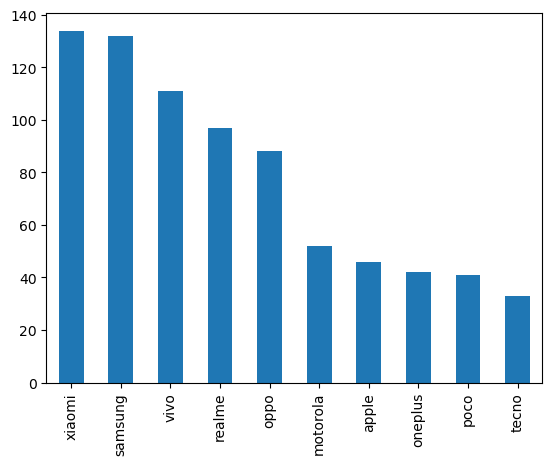

In [159]:
#plot graph of top 5 brands 
df1['brand_name'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:ylabel='brand_name'>

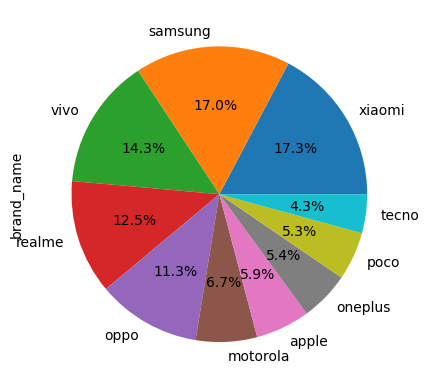

In [160]:
df1['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [161]:
df1['brand_name'].isnull().sum()

0

In [162]:
#MODEL 
df1['model'].nunique()

980

In [163]:
#price - univariate analysis 

In [164]:
df1['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

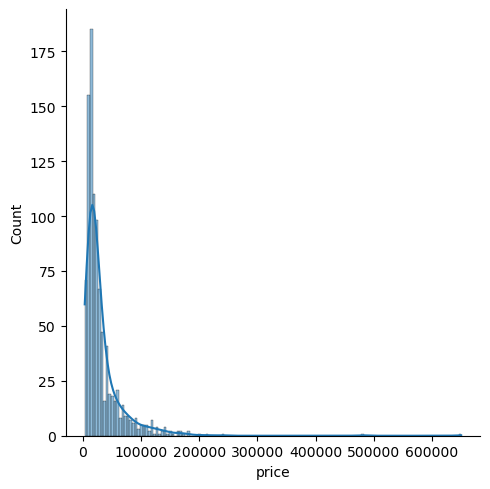

In [165]:
sns.displot(kind='hist',data=df1,x='price',kde=True)

In [166]:
df1['price'].skew()

6.591790999665567

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

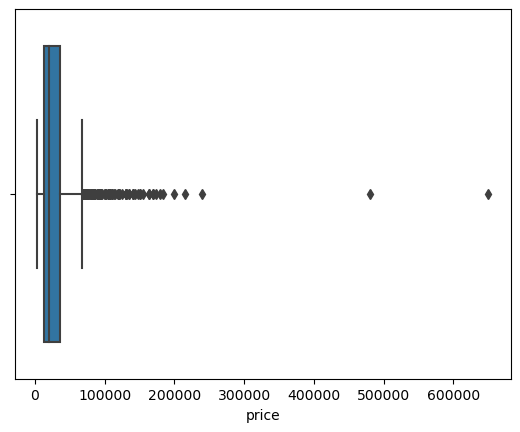

In [167]:
sns.boxplot(df1['price'])

In [168]:
# the skewness
df1['price'].skew()

6.591790999665567

In [169]:
df1[df1['price']> 250000]

,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
431,vertu,Vertu Signature Touch,650000,62.0,"Single Sim, 3G, 4G, Wi-Fi, NFC",False,True,False,snapdragon,Octa Core,1.5,2275 mAh Battery,2275.0,-1,2.0,64.0,"4.7 inches, 1080 x 1920 px Display",4.70,60,1080 x 1920,13 MP Rear & 2.1 MP Front Camera,1,1,Memory Card Not Supported,android,13,2.1,0
921,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,snapdragon,Octa Core,2.8,4000 mAh Battery with 27W Fast Charging,4000.0,27,8.0,256.0,"6.39 inches, 1080 x 2340 px Display",6.39,60,1080 x 2340,48 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,3,1,Memory Card Not Supported,android,48,20,0


In [170]:
df1['price'].isnull().sum()

0

In [171]:
df1['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

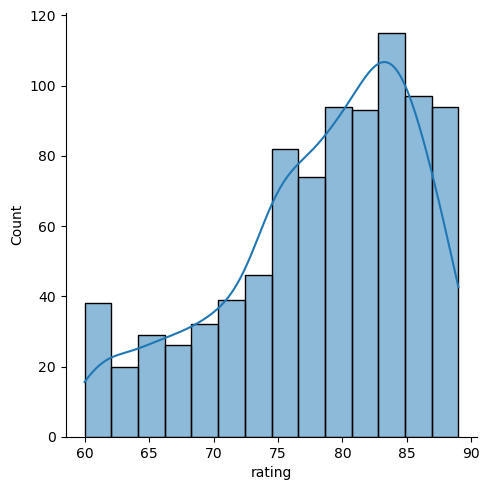

In [172]:
sns.displot(kind='hist',data=df1,x='rating',kde=True)

In [173]:
df1['rating'].skew()

-0.6989993034105535

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

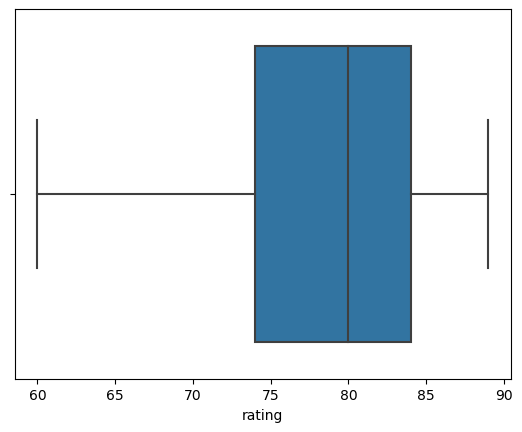

In [174]:
sns.boxplot(df1['rating'])

In [175]:
df1['rating'].isnull().sum()

101

In [176]:
df1['rating'].isnull().sum()/980


0.10306122448979592

In [177]:
#has_5g

<AxesSubplot:ylabel='has_5g'>

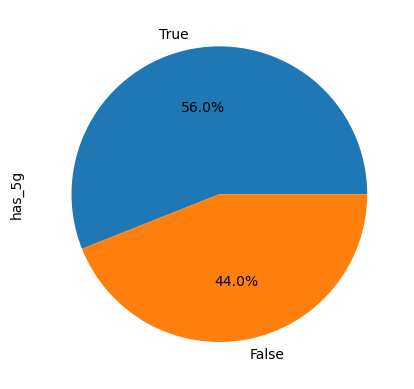

In [178]:
df1['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='has_nfc'>

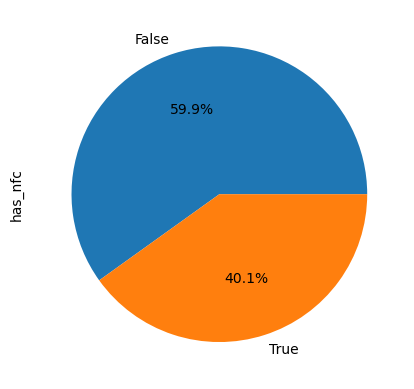

In [179]:
#has_nfc
df1['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='has_ir_blaster'>

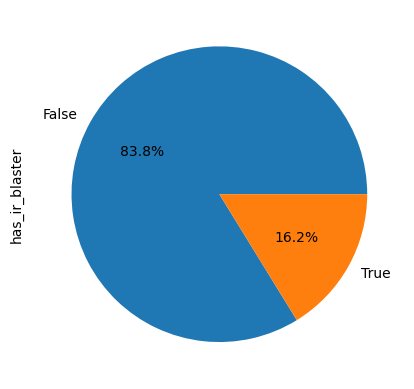

In [180]:
#has_ir_blaster
df1['has_ir_blaster'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [181]:
df1[df1['has_ir_blaster']==True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

In [182]:
df1['processor_brand'].value_counts()

snapdragon    407
helio         201
dimensity     177
exynos         49
bionic         39
unisoc         26
tiger          24
google          9
kirin           7
a13             5
qualcomm        5
spreadtrum      4
sc9863a         2
mediatek        1
apple           1
fusion          1
sanpdragon      1
samsung         1
Name: processor_brand, dtype: int64

<AxesSubplot:ylabel='processor_brand'>

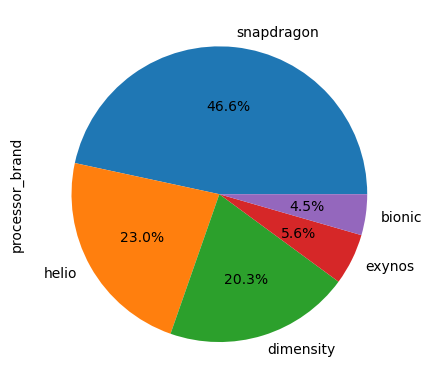

In [183]:
df1['processor_brand'].value_counts().head().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='num_cores'>

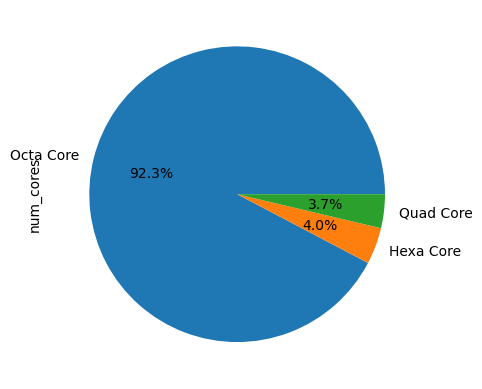

In [184]:
df1['num_cores'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='ram_capacity'>

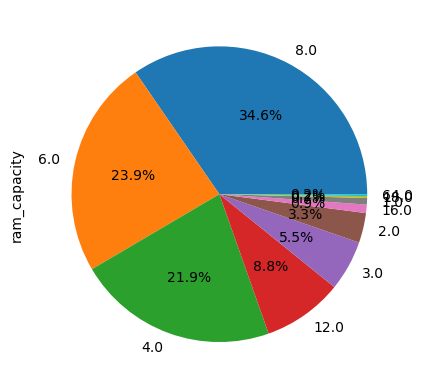

In [185]:
df1['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='internal_memory'>

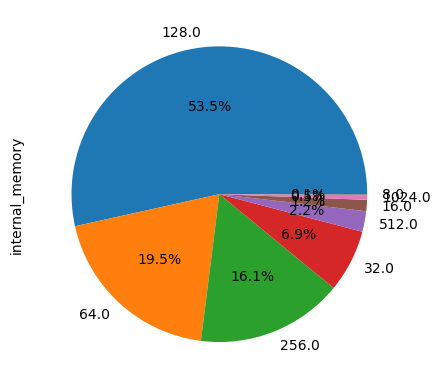

In [186]:
df1['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='refresh_rate'>

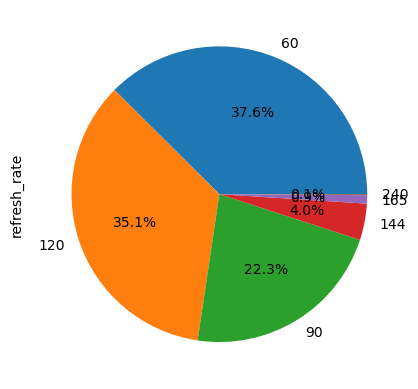

In [187]:
df1['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [188]:
df1['refresh_rate'].value_counts()

60     368
120    344
90     219
144     39
165      9
240      1
Name: refresh_rate, dtype: int64

<AxesSubplot:ylabel='None'>

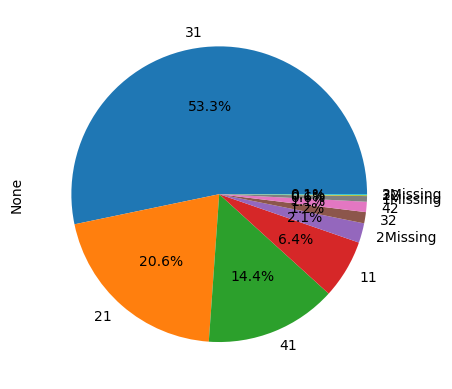

In [189]:
(df1['num_rear_cameras'] + df1['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='os'>

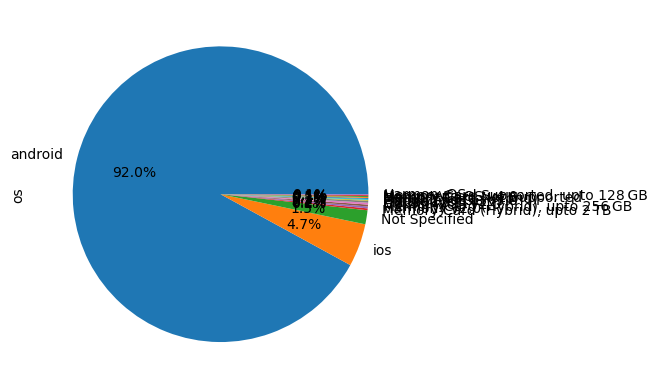

In [190]:
df1['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Bivariate Analysis

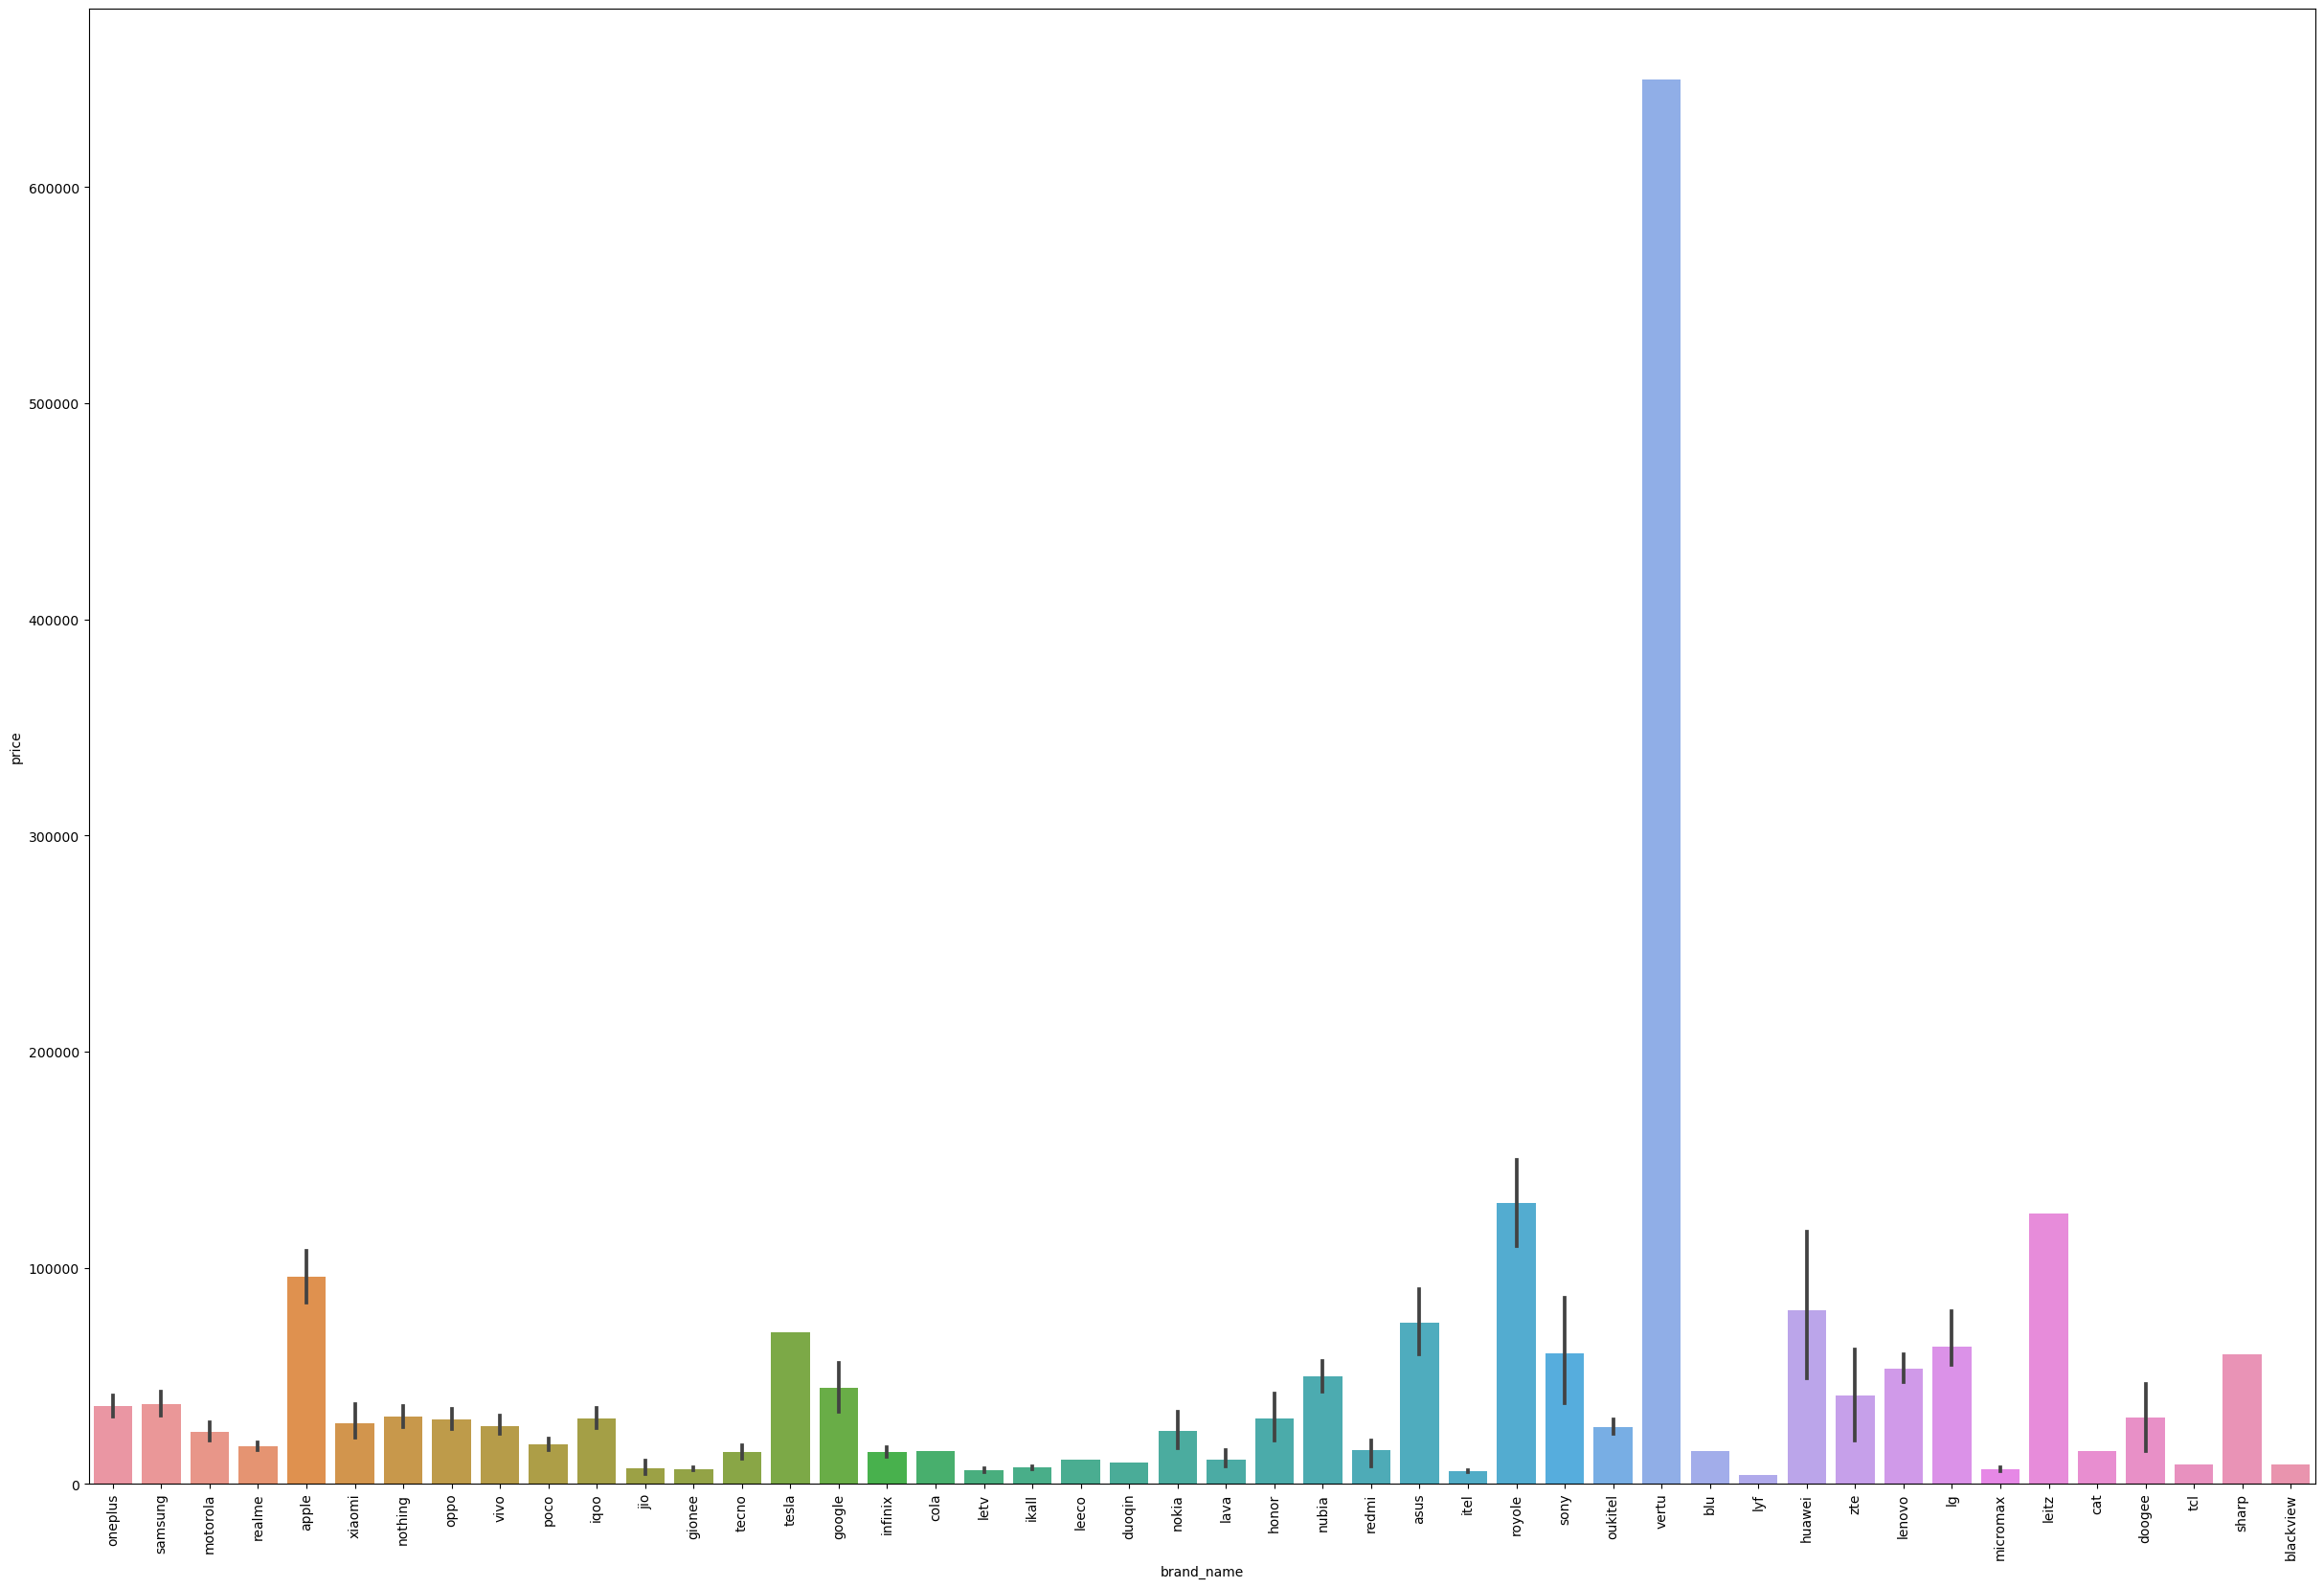

In [196]:
plt.figure(figsize=(30,20))
sns.barplot(data=df1, x='brand_name',y='price')
plt.xticks(rotation ='vertical')
plt.show()

In [200]:
x=df1.groupby('brand_name').count()['model']

In [206]:
temp_df=df1[df1['brand_name'].isin(x[x>10].index)]

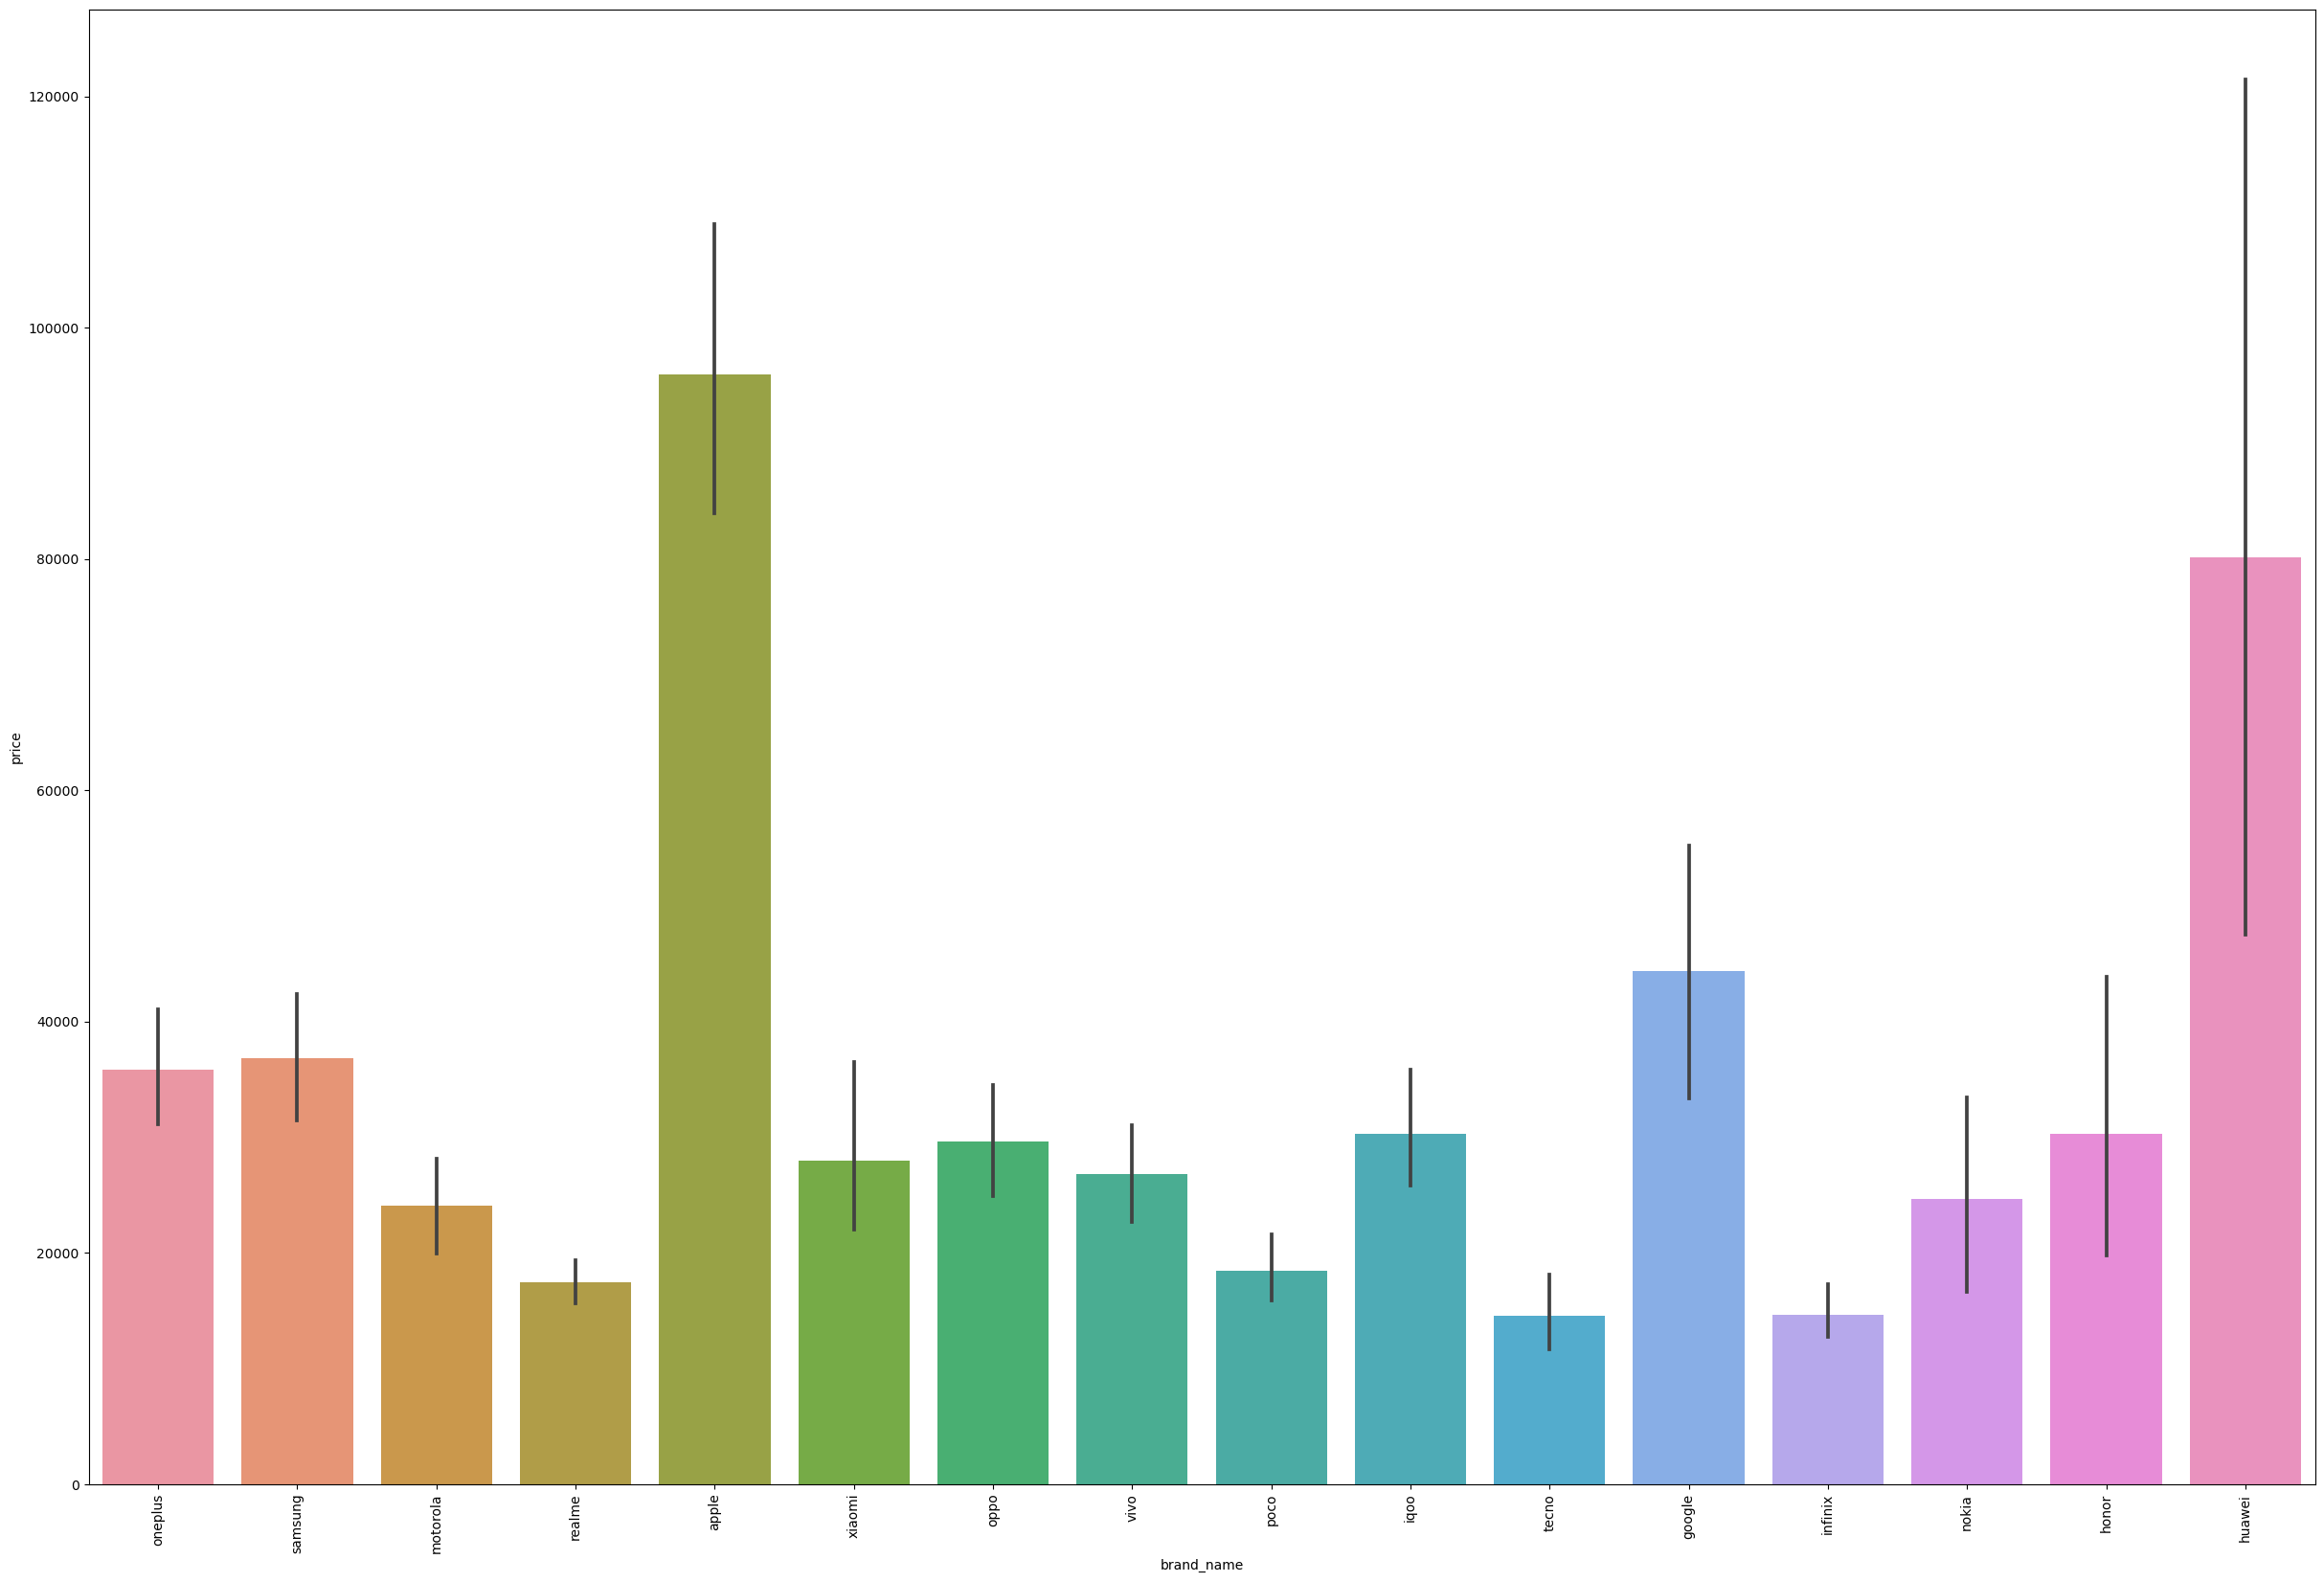

In [207]:
plt.figure(figsize=(30,20))
sns.barplot(data=temp_df, x='brand_name',y='price')
plt.xticks(rotation ='vertical')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='price'>

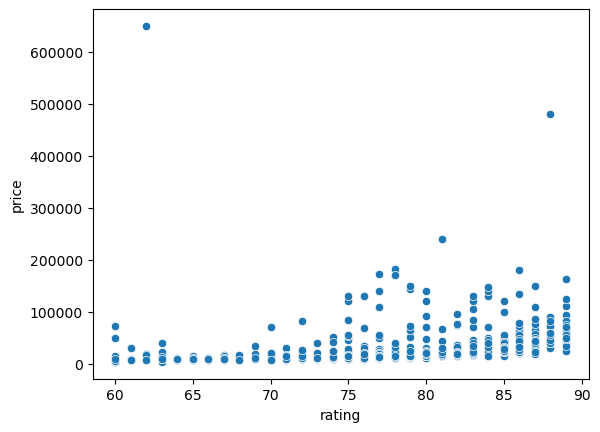

In [208]:
sns.scatterplot(data=df1,x='rating',y='price')

<AxesSubplot:xlabel='has_5g', ylabel='price'>

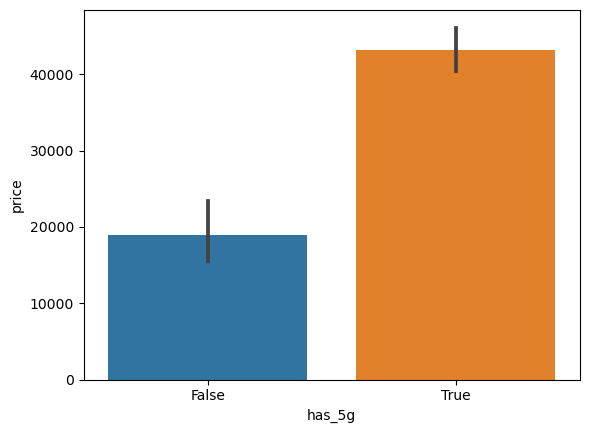

In [209]:
sns.barplot(data=df1,x='has_5g',y='price')

<AxesSubplot:xlabel='has_nfc', ylabel='price'>

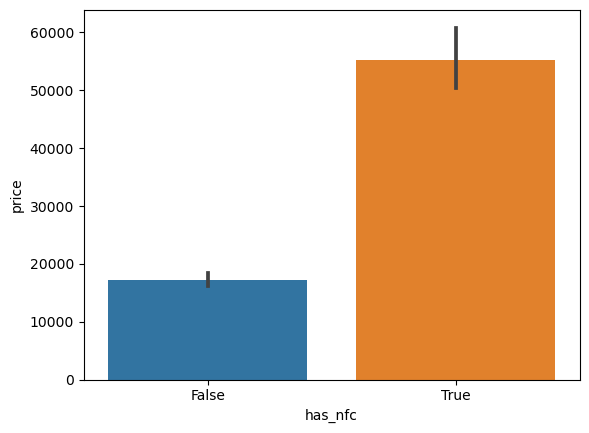

In [210]:
sns.barplot(data=df1,x='has_nfc',y='price')

<AxesSubplot:xlabel='has_nfc', ylabel='price'>

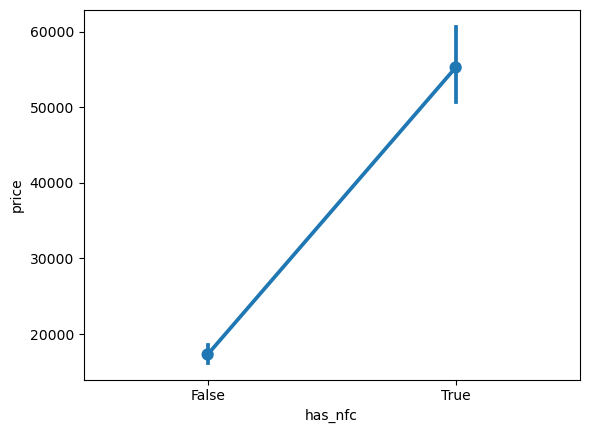

In [211]:
sns.pointplot(data=df1,x='has_nfc',y='price')

<AxesSubplot:xlabel='has_ir_blaster', ylabel='price'>

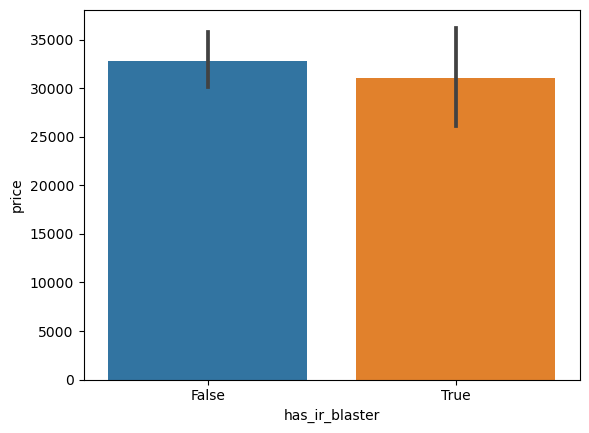

In [212]:
sns.barplot(data=df1,x='has_ir_blaster',y='price')

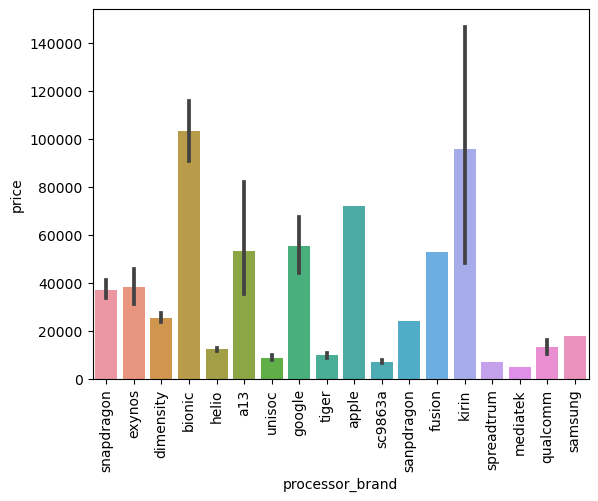

In [214]:
sns.barplot(data=temp_df,x='processor_brand',y='price')
plt.xticks(rotation='vertical')
plt.show()

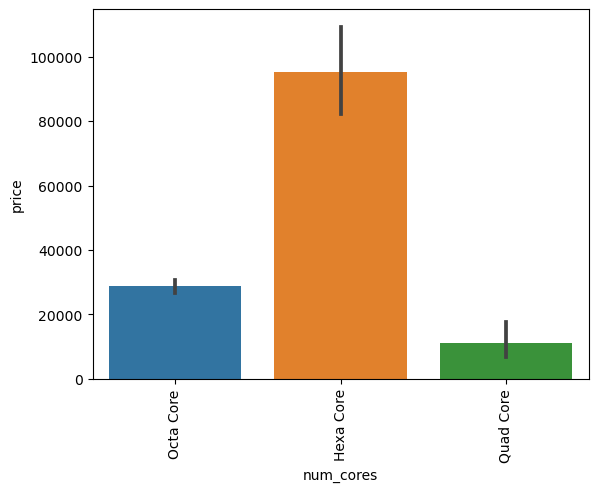

In [215]:
sns.barplot(data=temp_df,x='num_cores',y='price')
plt.xticks(rotation='vertical')
plt.show()

In [217]:
pd.crosstab(df1['num_cores'],df1['os'])

os,EMUI v12,Harmony v2.0,HarmonyOS,HarmonyOS v2,HarmonyOS v2.0,Hongmeng OS v3.0,Hongmeng OS v4.0,Memory Card (Hybrid),"Memory Card (Hybrid), upto 256 GB","Memory Card (Hybrid), upto 2 TB",Memory Card Not Supported,"Memory Card Supported, upto 128 GB",Not Specified,android,ios
num_cores,,,,,,,,,,,,,,,
Hexa Core,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39
Octa Core,2,2,1,0,2,1,1,1,2,2,1,0,15,868,1
Quad Core,0,0,0,1,0,0,0,0,0,0,0,1,0,33,1


<AxesSubplot:xlabel='processor_brand', ylabel='price'>

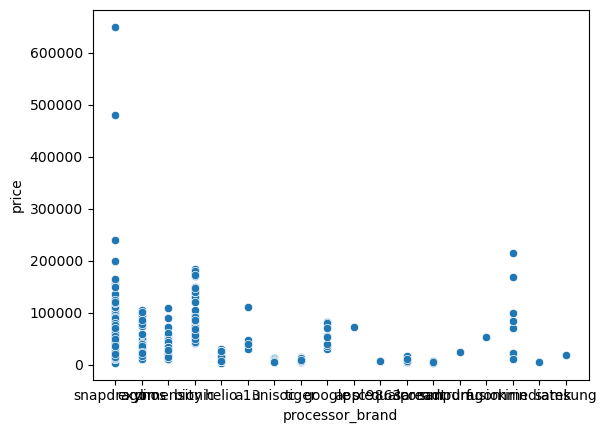

In [218]:
sns.scatterplot(data=df1,x='processor_brand',y='price')

<AxesSubplot:xlabel='screen_size', ylabel='price'>

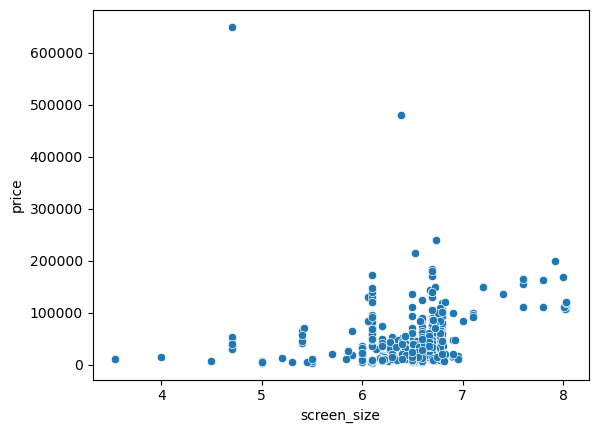

In [219]:
sns.scatterplot(data=df1,x='screen_size',y='price')

In [220]:
df1.corr()

,price,rating,has_5g,has_nfc,has_ir_blaster,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate
price,1.000000,0.283504,0.305066,0.470951,-0.015807,0.474049,-0.159232,0.140391,0.292540,0.558080,0.113253,0.244115
rating,0.283504,1.000000,0.596087,0.474754,0.156421,0.628446,-0.015581,0.580055,0.542422,0.480757,0.298272,0.610795
has_5g,0.305066,0.596087,1.000000,0.481702,0.105542,0.609583,-0.013237,0.467065,0.417040,0.405681,0.230598,0.611794
has_nfc,0.470951,0.474754,0.481702,1.000000,-0.032541,0.609664,-0.106104,0.338512,0.372962,0.415724,0.103099,0.410777
has_ir_blaster,-0.015807,0.156421,0.105542,-0.032541,1.000000,0.102744,0.059852,0.265780,0.028952,0.030163,0.140809,0.178378
processor_speed,0.474049,0.628446,0.609583,0.609664,0.102744,1.000000,-0.041930,0.544920,0.509129,0.530244,0.290366,0.555004
battery_capacity,-0.159232,-0.015581,-0.013237,-0.106104,0.059852,-0.041930,1.000000,0.053593,0.085690,-0.001444,0.348805,0.088636
fast_charging,0.140391,0.580055,0.467065,0.338512,0.265780,0.544920,0.053593,1.000000,0.397975,0.297714,0.329444,0.608198
ram_capacity,0.292540,0.542422,0.417040,0.372962,0.028952,0.509129,0.085690,0.397975,1.000000,0.591799,0.182666,0.381240
internal_memory,0.558080,0.480757,0.405681,0.415724,0.030163,0.530244,-0.001444,0.297714,0.591799,1.000000,0.275910,0.379306


<AxesSubplot:>

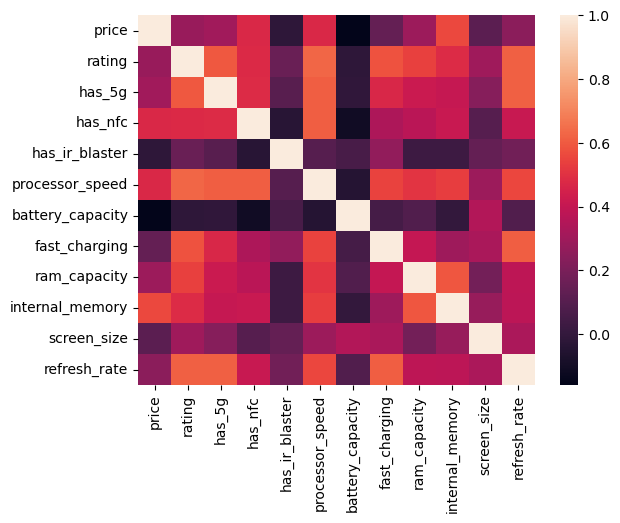

In [222]:
sns.heatmap(df1.corr())

In [224]:
df1.corr()['price']

price               1.000000
rating              0.283504
has_5g              0.305066
has_nfc             0.470951
has_ir_blaster     -0.015807
processor_speed     0.474049
battery_capacity   -0.159232
fast_charging       0.140391
ram_capacity        0.292540
internal_memory     0.558080
screen_size         0.113253
refresh_rate        0.244115
Name: price, dtype: float64

In [225]:
df1.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
sim                       0
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_brand          20
num_cores                 6
processor_speed          42
battery                  11
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           2
display                   0
screen_size               0
refresh_rate              0
resolution                0
camera                    0
num_rear_cameras          0
num_front_cameras         0
card                      0
os                        0
primary_camera_rear       0
primary_camera_front     28
extended_memory           0
dtype: int64

In [228]:
df1.corr()['rating']

price               0.283504
rating              1.000000
has_5g              0.596087
has_nfc             0.474754
has_ir_blaster      0.156421
processor_speed     0.628446
battery_capacity   -0.015581
fast_charging       0.580055
ram_capacity        0.542422
internal_memory     0.480757
screen_size         0.298272
refresh_rate        0.610795
Name: rating, dtype: float64

In [ ]:
#knn imputer 

In [229]:
df1.shape

(980, 28)

In [231]:
df1.select_dtypes(include=['int64','float64'])

,rating,processor_speed,battery_capacity,ram_capacity,internal_memory,screen_size
0,89.0,3.20,5000.0,12.0,256.0,6.70
1,81.0,2.20,5000.0,6.0,128.0,6.59
2,75.0,2.40,5000.0,4.0,64.0,6.60
3,81.0,2.20,5000.0,6.0,128.0,6.55
4,82.0,2.60,5000.0,6.0,128.0,6.70
5,80.0,2.20,5000.0,6.0,128.0,6.60
6,81.0,3.22,3279.0,6.0,128.0,6.10
7,86.0,2.60,4980.0,8.0,256.0,6.67
8,85.0,2.50,4500.0,8.0,128.0,6.55
9,84.0,3.00,4500.0,8.0,128.0,6.43


In [237]:
x_df1=df1.select_dtypes(include=['int64','float64']).head(5)

In [233]:
from sklearn.impute import KNNImputer

In [234]:
imputer = KNNImputer(n_neighbors=5)

In [238]:
x_df1_values = imputer.fit_transform(x_df1)

In [240]:
x_df1 = pd.DataFrame(x_df1_values,columns=x_df1.columns)

In [241]:
x_df1['price'] = df1['price']

In [242]:
x_df1.head()

,rating,processor_speed,battery_capacity,ram_capacity,internal_memory,screen_size,price
0,89.0,3.2,5000.0,12.0,256.0,6.70,54999
1,81.0,2.2,5000.0,6.0,128.0,6.59,19989
2,75.0,2.4,5000.0,4.0,64.0,6.60,16499
3,81.0,2.2,5000.0,6.0,128.0,6.55,14999
4,82.0,2.6,5000.0,6.0,128.0,6.70,24999


In [243]:
a = x_df1.corr()['price'].reset_index()

In [244]:
b = df1.corr()['price'].reset_index()

In [245]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.873549
2,processor_speed,0.474049,0.958059
3,battery_capacity,-0.159232,NaN
4,ram_capacity,0.292540,0.958172
5,internal_memory,0.558080,0.929528
6,screen_size,0.113253,0.746850


In [246]:
pd.get_dummies(df1,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

price                                    1.000000
rating                                   0.283504
has_5g                                   0.305066
has_nfc                                  0.470951
has_ir_blaster                          -0.015807
processor_speed                          0.474049
battery_capacity                        -0.159232
fast_charging                            0.140391
ram_capacity                             0.292540
internal_memory                          0.558080
screen_size                              0.113253
refresh_rate                             0.244115
brand_name_asus                          0.090566
brand_name_blackview                    -0.019033
brand_name_blu                          -0.014180
brand_name_cat                          -0.014173
brand_name_cola                         -0.014173
brand_name_doogee                       -0.002314
brand_name_duoqin                       -0.018224
brand_name_gionee                       -0.035937
